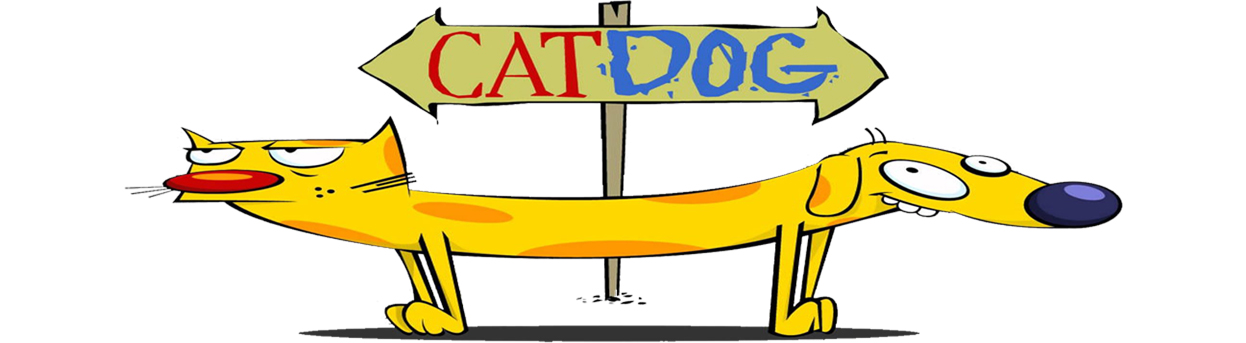

In [197]:
from IPython.display import Image
Image("cat vs dog.jpg")

### In this notebook we will try to classify between dog and cat given a folder with 12,500 pictures of cats and 12,500 pictures of dogs. We will do this using different models.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import os
import cv2
from skimage.io import imread
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA   
from sklearn.model_selection import train_test_split
import seaborn as sns
import time        

## Random display of images from the folder

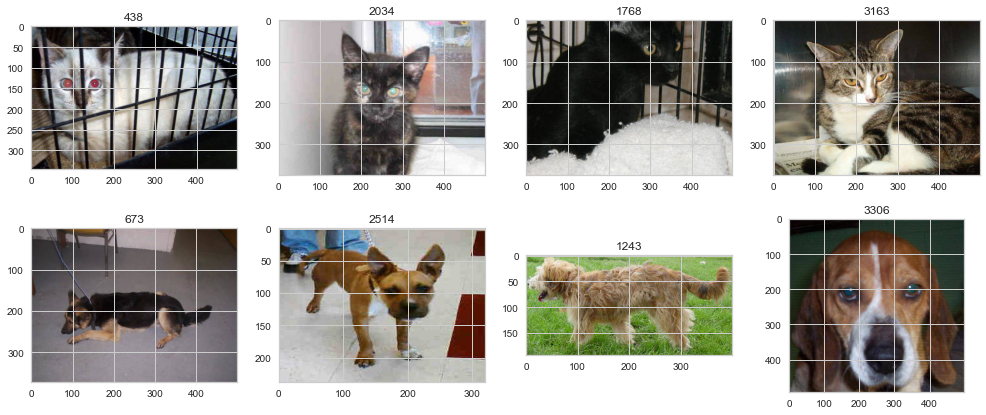

In [207]:
f = plt.figure(figsize=(17,7))
for i in range(1,5):
    r=random.randint(1,4001)
    img=mpimg.imread("train/cat.{}.jpg".format(r))
    ax=f.add_subplot(2,4,i)
    ax.title.set_text(r)
    plt.imshow(img)
    r=random.randint(1,4001)
    img=mpimg.imread("train/dog.{}.jpg".format(r))
    ax=f.add_subplot(2,4,i+4)
    ax.title.set_text(r)
    plt.imshow(img)

## The process of changing the images to a dataset

In [3]:
#fanction that change the size and the color of the pictures 
def readImg_gray(file_path):
    img = cv2.imread(file_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (64,64))
    return resized_img

In [4]:
#fanction to change from tictures to Array
def TrainToArr(name, num):    
    m=12500
    n_x = 64*64
    X = np.ndarray((m,n_x), dtype=np.uint8)
    y = np.zeros((m,1))
    folder = 'train/'
    for i in range(m):
        img = readImg_gray(folder + name+ '.' + str(i) + '.jpg')
        X[i,:] = np.squeeze(img.reshape((n_x,1)))
        y[i,0] = num
    return X,y

In [5]:
#we got:
X_dog,Y_dog=TrainToArr('dog', num=1)
X_cat,Y_cat=TrainToArr('cat', num=0)

#### Cat data

In [6]:
X_Cat=pd.DataFrame(data=X_cat)
print (X_Cat.shape)
X_Cat.head()

(12500, 4096)


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,170,176,183,188,192,196,200,202,205,208,...,10,9,3,3,3,2,2,2,2,2
1,43,42,36,29,41,43,72,38,37,37,...,77,64,38,39,56,58,53,72,68,29
2,52,46,61,64,130,134,75,210,194,171,...,60,46,60,48,48,32,49,44,42,49
3,156,169,191,190,185,141,124,127,132,201,...,133,182,192,146,190,173,195,176,171,181
4,141,158,166,172,173,177,179,181,182,184,...,12,11,11,11,13,10,11,12,10,9


In [7]:
X_Cat['label'] = Y_cat
cat_data=X_Cat
cat_data.head()
#the cat dataset

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,170,176,183,188,192,196,200,202,205,208,...,9,3,3,3,2,2,2,2,2,0.0
1,43,42,36,29,41,43,72,38,37,37,...,64,38,39,56,58,53,72,68,29,0.0
2,52,46,61,64,130,134,75,210,194,171,...,46,60,48,48,32,49,44,42,49,0.0
3,156,169,191,190,185,141,124,127,132,201,...,182,192,146,190,173,195,176,171,181,0.0
4,141,158,166,172,173,177,179,181,182,184,...,11,11,11,13,10,11,12,10,9,0.0


#### Dog Data

In [8]:
X_Dog=pd.DataFrame(data=X_dog)
print (X_Dog.shape)
X_Dog.head()

(12500, 4096)


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,115,144,161,163,131,134,128,137,140,141,...,143,96,94,84,79,75,71,76,74,86
1,110,122,101,110,94,116,107,120,119,84,...,239,247,242,233,245,246,245,240,239,233
2,178,161,164,135,165,168,162,167,166,162,...,195,190,190,193,196,199,202,206,211,217
3,227,224,203,202,211,220,223,201,195,240,...,167,171,170,171,166,168,172,168,166,164
4,150,149,149,153,153,154,157,158,151,146,...,170,166,157,152,105,65,62,56,36,38


In [9]:
X_Dog['label'] = Y_dog
dog_data= X_Dog
dog_data.head()
#the Dog dataset

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,115,144,161,163,131,134,128,137,140,141,...,96,94,84,79,75,71,76,74,86,1.0
1,110,122,101,110,94,116,107,120,119,84,...,247,242,233,245,246,245,240,239,233,1.0
2,178,161,164,135,165,168,162,167,166,162,...,190,190,193,196,199,202,206,211,217,1.0
3,227,224,203,202,211,220,223,201,195,240,...,171,170,171,166,168,172,168,166,164,1.0
4,150,149,149,153,153,154,157,158,151,146,...,166,157,152,105,65,62,56,36,38,1.0


#### Union the Dog&Cat data sets: 

In [10]:
train_data=pd.concat([cat_data,dog_data])
train_data=train_data.sample(frac=1)
train_data.head()
#this is our train dataset

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
4029,136,121,144,149,152,147,150,145,136,141,...,82,82,72,65,67,77,73,72,71,1.0
9920,167,123,101,197,228,92,199,172,54,82,...,254,255,255,254,254,255,255,255,254,0.0
3935,178,176,176,173,172,177,177,177,174,162,...,124,118,113,115,117,121,131,124,115,1.0
3185,84,82,82,64,60,77,67,86,91,77,...,158,148,154,169,161,172,156,162,169,1.0
4243,138,71,131,68,143,74,92,116,140,140,...,142,139,127,99,122,123,108,132,155,1.0


In [30]:
#lets split the data for x and y so we can to normalize the x data
x= train_data.drop(['label'],axis=1)
y=train_data['label']

In [31]:
#Normalize the data:
tmp=x.values
min_max_scaler=MinMaxScaler()
scaled=min_max_scaler.fit_transform(tmp)
x=pd.DataFrame(scaled)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.533333,0.474510,0.564706,0.584314,0.596078,0.576471,0.588235,0.568627,0.533333,0.552941,...,0.286275,0.321569,0.321569,0.282353,0.254902,0.262745,0.301961,0.286275,0.282353,0.278431
1,0.654902,0.482353,0.396078,0.772549,0.894118,0.360784,0.780392,0.674510,0.211765,0.321569,...,1.000000,0.996078,1.000000,1.000000,0.996078,0.996078,1.000000,1.000000,1.000000,0.996078
2,0.698039,0.690196,0.690196,0.678431,0.674510,0.694118,0.694118,0.694118,0.682353,0.635294,...,0.466667,0.486275,0.462745,0.443137,0.450980,0.458824,0.474510,0.513725,0.486275,0.450980
3,0.329412,0.321569,0.321569,0.250980,0.235294,0.301961,0.262745,0.337255,0.356863,0.301961,...,0.658824,0.619608,0.580392,0.603922,0.662745,0.631373,0.674510,0.611765,0.635294,0.662745
4,0.541176,0.278431,0.513725,0.266667,0.560784,0.290196,0.360784,0.454902,0.549020,0.549020,...,0.521569,0.556863,0.545098,0.498039,0.388235,0.478431,0.482353,0.423529,0.517647,0.607843


In [63]:
pd.DataFrame(data=y_train)

,label
5086,1.0
7085,1.0
3937,0.0
10947,1.0
6304,0.0
...,...
8625,0.0
5554,0.0
8046,1.0
362,0.0


### now we will use diffrent Models to classify the data

In [18]:
#Imporets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier 
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns

#### after Normalization we can lower dimensions by using PCA:

In [16]:
pca= PCA(n_components=16)
X_reduced = pca.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)

X_reduced.shape

(25000, 16)

## KNN

In [230]:
k_time=time.time()
k_range = list(range(1, 20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)
TimeTaken=time.time() -kmStartTime
print("Time taken to achive result: %s seconds" % (TimeTaken))

[0.554, 0.5604, 0.5764, 0.5738, 0.5818, 0.5896, 0.5936, 0.604, 0.5998, 0.6078, 0.6032, 0.6106, 0.6064, 0.605, 0.61, 0.6054, 0.6076, 0.6142, 0.6074]
Time taken to achive result: 55200.26025915146 seconds


Text(0, 0.5, 'Testing Accuracy')

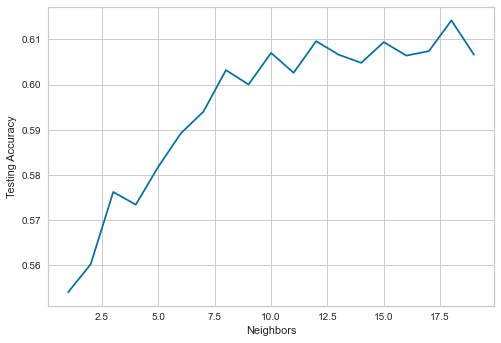

In [212]:
# the connection between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Neighbors')
plt.ylabel('Testing Accuracy')

### It seems that for 19 we will get the best result, so we will use it

Time taken to achive result: 0.07867765426635742 seconds
Confusion Matrix for KNN


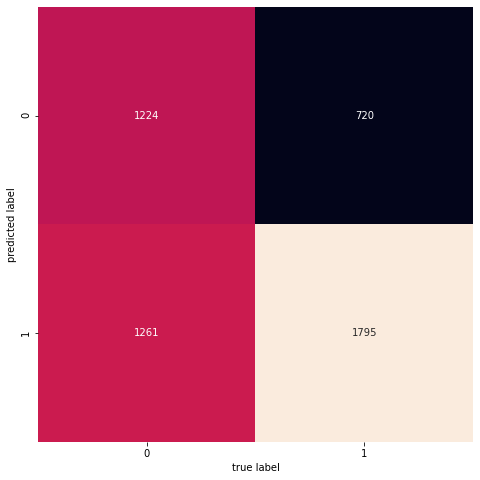

              precision    recall  f1-score   support

         0.0       0.63      0.49      0.55      2485
         1.0       0.59      0.71      0.64      2515

    accuracy                           0.60      5000
   macro avg       0.61      0.60      0.60      5000
weighted avg       0.61      0.60      0.60      5000

This KNN model's Accuracy Score with cross validation is  [0.566 0.566 0.59  0.582 0.61 ]
Accuracy: 0.6038


In [21]:
knnStartTime=time.time()
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
knnTimeTaken=time.time() -knnStartTime
print("Time taken to achive result: %s seconds" % (knnTimeTaken))
y_pred=knn.predict(X_test)
plt.figure(1, figsize= (8,8))
cm=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print("Confusion Matrix for KNN")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close() 
print(classification_report(y_test,y_pred))
score= cross_val_score(knn, X_test, y_test, cv=5,scoring='accuracy')
print("This KNN model's Accuracy Score with cross validation is ", score)
y_pred=knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

### We can see results not not high enough but at least we pass the fifty percent exact result in the classification

## Logistic Regression

In [216]:
reglog=LogisticRegression()
reglog=LogisticRegression(solver='liblinear',C=0.1,penalty='l2')
# fit the model with data
reglog.fit(X_train,y_train)
# predict the response values for the observations in X
y_pred=reglog.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.579

##  Random Forest

Accuracy: 0.6262
Confusion Matrix for Random Forest


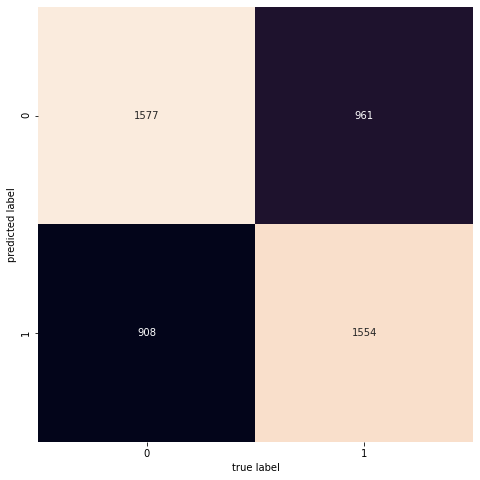

In [23]:
rf_clf=RandomForestClassifier(n_estimators=150)
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plt.figure(1, figsize= (8,8))
cm=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print("Confusion Matrix for Random Forest")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close() 

## AdaBoost

In [240]:
adb_clfTime=time.time()
adb_clf = AdaBoostClassifier(n_estimators=150,
                         learning_rate=1)
adb_clf.fit(X_train, y_train)
y_pred= adb_clf.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
adb_clfTimeTaken=time.time() -xgbStartTime
print("Time taken to achive result: %s seconds" % (adb_clfTimeTaken))


              precision    recall  f1-score   support

         0.0       0.61      0.57      0.59      2502
         1.0       0.60      0.64      0.62      2498

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000

Accuracy = 0.6024
Time taken to achive result: 844.1503043174744 seconds


## K MEANS

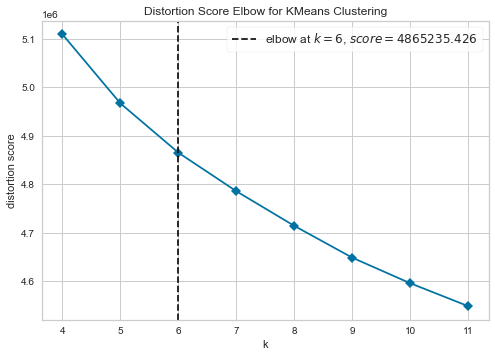

In [104]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(4,12), timings=False)
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [242]:
kmStartTime=time.time()
km = KMeans(n_clusters=2, random_state=1,max_iter=100)
km.fit(X_train, y_train)
y_km= km.predict(X_test)
print(classification_report(y_test,y_pred))
xgbTimeTaken=time.time() -xgbStartTime
kmTimeTaken=time.time() -kmStartTime
print("Time taken to achive result: %s seconds" % (kmTimeTaken))

              precision    recall  f1-score   support

         0.0       0.63      0.58      0.61      2502
         1.0       0.61      0.66      0.63      2498

    accuracy                           0.62      5000
   macro avg       0.62      0.62      0.62      5000
weighted avg       0.62      0.62      0.62      5000

Time taken to achive result: 0.15595483779907227 seconds


## XGBoost

In [241]:
xgbStartTime=time.time()
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred=xgb_clf.predict(X_test)

print(classification_report(y_test,y_pred))
xgbTimeTaken=time.time() -xgbStartTime
print("Time taken to achive result: %s seconds" % (xgbTimeTaken))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.63      0.58      0.61      2502
         1.0       0.61      0.66      0.63      2498

    accuracy                           0.62      5000
   macro avg       0.62      0.62      0.62      5000
weighted avg       0.62      0.62      0.62      5000

Time taken to achive result: 1.7353265285491943 seconds


## GradientBoosting

In [176]:
gbcStartTime=time.time()
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
gbcTimeTaken=time.time() -gbcStartTime
print("Time taken to achive result: %s seconds" % (gbcTimeTaken))


              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60      2502
         1.0       0.61      0.68      0.64      2498

    accuracy                           0.62      5000
   macro avg       0.63      0.63      0.62      5000
weighted avg       0.63      0.62      0.62      5000

Accuracy = 0.625
Time taken to achive result: 9.096662759780884 seconds


## Stacking

In [234]:
stacking_clf=StackingClassifier(estimators=[('rf',rf_clf),('kn',knn)],final_estimator=LogisticRegression())
stacking_clf.fit(X_train,y_train)
y_pred= stacking_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6368

## Bagging

In [26]:
Bagging_clf=BaggingClassifier(base_estimator=rf_clf,n_estimators=10, random_state=0)
Bagging_clf.fit(X_train,y_train)
y_pred= Bagging_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6346

Confusion Matrix for Bagging:


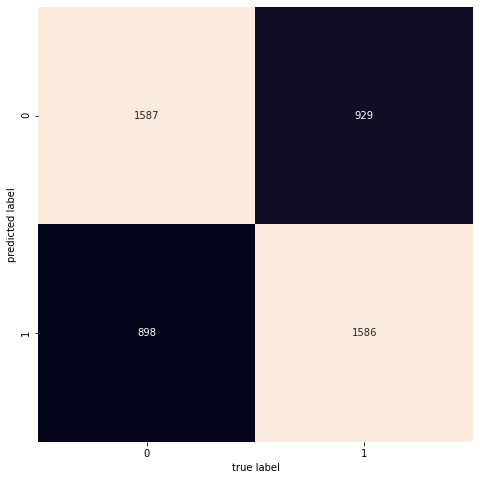

In [27]:
#Confusion Matrix for Stacking
plt.figure(1, figsize= (8,8))
cm=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print("Confusion Matrix for Bagging:")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close() 

## And for conclusion

In [19]:
data = {'KNeighbors':  ['60.70%'],
        'Logistic Regression': ['57.9%'],
        'Random Forest': ['63.96%'],
        'K means': ['62%'],
        'GradientBoosting': ['62.5%'],
        'stacking':['63.68%'],
        'AdaBoost':['60.24%'],
        'xgboost':['62%'],
        'Bagging':['64.88%']
        }
df = pd.DataFrame (data, columns = ['KNeighbors','Logistic Regression','Random Forest','K means','GradientBoosting','stacking','AdaBoost','xgboost','Bagging']
                   ,index=['accuracy'])
df

,KNeighbors,Logistic Regression,Random Forest,K means,GradientBoosting,stacking,AdaBoost,xgboost,Bagging
accuracy,60.70%,57.9%,63.96%,62%,62.5%,63.68%,60.24%,62%,64.88%


### we can see BAGGING has the higest accuracy

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
bagging_clf=BaggingClassifier(base_estimator=rf_clf,n_estimators=15, random_state=0)
bagging_clf.fit(X_train,y_train)
y_pred= bagging_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)
#BAGGING for the original data

0.6486

#### here we got the beat accuracy on the original data and Bagging: 64.86%